# 2 MuSCAT2 joint analysis
## 2.1 Joint analysis of three MuSCAT nights of TOI 263.01 observations

Here we model the light curves from the three nights of previously reduced MuSCAT2 observations using a transit model that allows for contamination from an unresolved source. The model is implemented in `src.m2lpf.M2LPF`

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
from pytransit.orbits import epoch

In [2]:
%run src/m2lpf.py

In [3]:
lpf = M2LPF('toi_263_m2', use_ldtk=False)

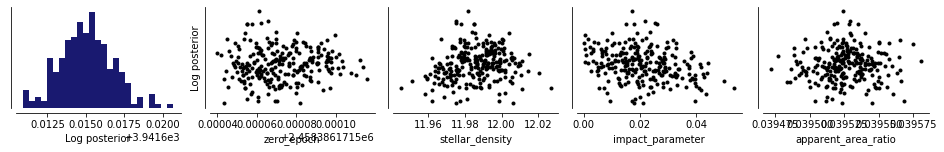

In [5]:
lpf.optimize_global(niter=5000, npop=250)

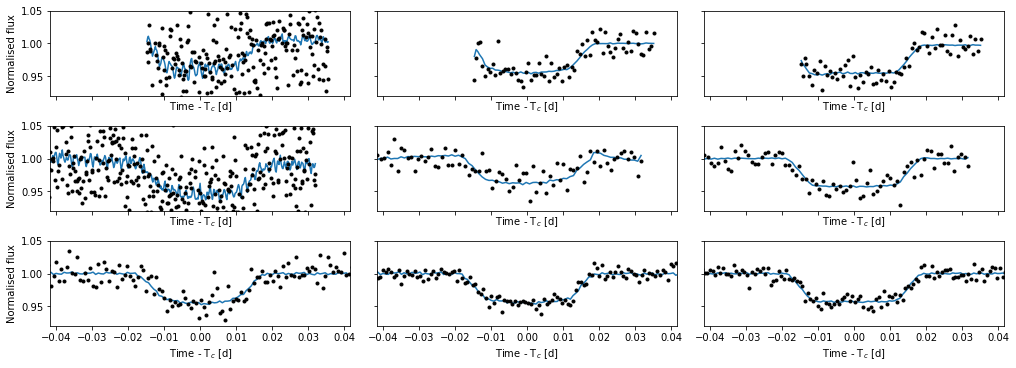

In [6]:
fig = lpf.plot_light_curves(figsize=(14,5), width=2);
setp(fig.axes, ylim=(0.92, 1.05));

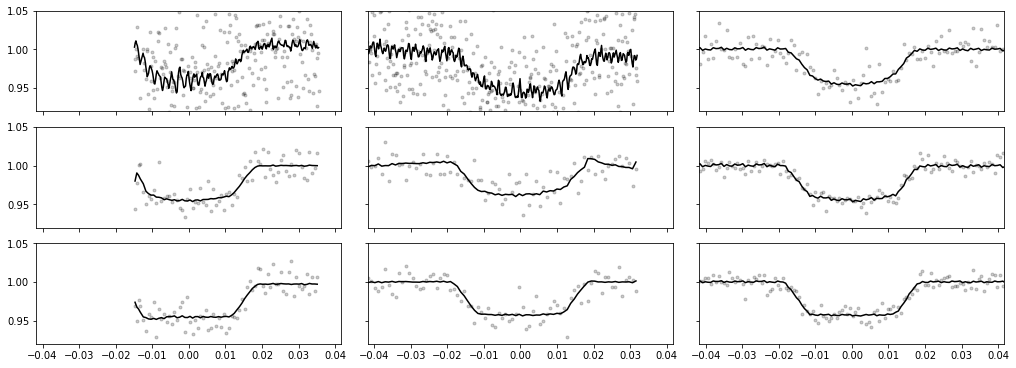

In [9]:
fig, axs = subplots(3, 3, figsize=(14,5), constrained_layout=True, sharex='all', sharey='all')
fmodel = squeeze(lpf.flux_model(lpf.de.minimum_location))
t0, p = lpf.de.minimum_location[0], lpf.de.minimum_location[1]
for i,ax in enumerate(axs.T.flat):
    t = lpf.times[i]
    e = epoch(t.mean(), t0, p)
    tc = t0 + e*p
    ax.plot(t-tc, lpf.fluxes[i], 'k.', alpha=0.2)
    ax.plot(t-tc, fmodel[lpf.lcslices[i]], 'k');
    setp(ax, xlim=(-1/24, 1/24))
setp(axs, ylim=(0.92, 1.05));

In [10]:
lpf.sample_mcmc(5000, thin=50, repeats=5, save=True)

In [11]:
lpf.sample_mcmc(10000, thin=100, repeats=5, save=True)

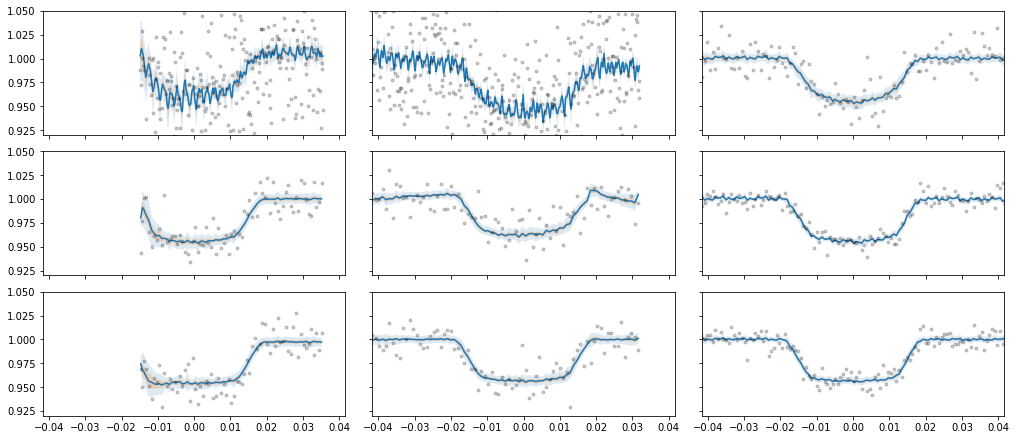

In [12]:
df = lpf.posterior_samples(derived_parameters=False)
fig, axs = subplots(3, 3, figsize=(14,6), constrained_layout=True, sharex='all', sharey='all')
fmodel = lpf.flux_model(permutation(df.values)[:1000])
fmperc = percentile(fmodel, [50, 16, 84, 0.5, 99.5], 0)

t0, p = lpf.de.minimum_location[0], lpf.de.minimum_location[1]
for i,ax in enumerate(axs.T.flat):
    t = lpf.times[i]
    e = epoch(t.mean(), t0, p)
    tc = t0 + e*p
    ax.fill_between(t-tc, *fmperc[3:5, lpf.lcslices[i]], alpha=0.15)
    ax.fill_between(t-tc, *fmperc[1:3, lpf.lcslices[i]], alpha=0.25)
    ax.plot(t-tc, fmperc[0, lpf.lcslices[i]])
    ax.plot(t-tc, lpf.fluxes[i], 'k.', alpha=0.2)
    setp(ax, xlim=(-1/24, 1/24))
setp(axs, ylim=(0.92, 1.05));

---


<center> © 2019 Hannu Parviainen </center>